In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
def load_images(path,label,size=(224,224)):
    image = tf.io.read_file(path)
    image = tf.io.decode_image(image,channels=3,expand_animations=False)
    image = tf.image.resize(image,size=size)

    image = image/255.0

    return (image,label)


In [53]:
data = []

path1 = "./data/ujjwal/"
path2 = "./data/modi/"
path3 = "./data/pappu/"

for i in range(1,19):
    x = load_images(path=path1+str(i)+".jpeg",label=1)
    data.append({"image" : x[0],"label" : x[1]})


for i in range(1,19):
    x = load_images(path=path2+str(i)+".jpg",label=2)
    data.append({"image" : x[0],"label" : x[1]})
    # data.append()


for i in range(1,19):
    x = load_images(path=path3+str(i)+".jpg",label=3)
    data.append({"image" : x[0],"label" : x[1]})
    # data.append()

In [54]:
length = len(data)
for i in range(0,length):
    augmented_image_1 = tf.image.flip_left_right(data[i]['image'])
    augmented_image_2 = tf.image.adjust_brightness(data[i]['image'],-0.1)
    augmented_image_3 = tf.image.adjust_brightness(augmented_image_1,0.1)
    augmented_image_4 = tf.image.adjust_contrast(augmented_image_1,0.5)
    augmented_image_5 = tf.image.adjust_contrast(data[i]['image'],0.5)
    data.append({"image" : augmented_image_1,"label" : data[i]['label']})
    data.append({"image" : augmented_image_2,"label" : data[i]['label']})
    data.append({"image" : augmented_image_3,"label" : data[i]['label']})
    data.append({"image" : augmented_image_4,"label" : data[i]['label']})
    data.append({"image" : augmented_image_5,"label" : data[i]['label']})
    

In [55]:
data[0]['label']

1

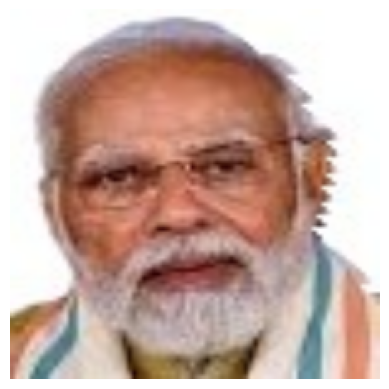

In [56]:
plt.imshow(data[32]['image'].numpy())
plt.axis('off')
plt.show()

In [57]:
random.seed(42)
random.shuffle(data)

In [58]:
input = []
output = []

for i in data:
    input.append(i["image"])
    output.append(i["label"])


output = tf.convert_to_tensor(output,dtype=tf.int8)

In [59]:
# input=tf.expand_dims(input=input,axis=0)
input = tf.convert_to_tensor(input,dtype=tf.float32)
input

<tf.Tensor: shape=(324, 224, 224, 3), dtype=float32, numpy=
array([[[[0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         ...,
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ]],

        [[0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         ...,
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ]],

        [[0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         ...,
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ],
         [0.9       , 0.9       , 0.9       ]],

        ...,

        [[0.22060499, 0.25197753

In [60]:
# output = tf.expand_dims(input=output,axis=0)
output

<tf.Tensor: shape=(324,), dtype=int8, numpy=
array([2, 2, 2, 1, 2, 1, 2, 3, 1, 1, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3,
       3, 3, 1, 3, 3, 1, 2, 1, 3, 2, 2, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3,
       2, 2, 1, 1, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 3, 2, 1, 1, 3, 2, 1, 2,
       2, 1, 2, 2, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 3, 1, 2, 1, 1, 1, 3, 2, 3, 2, 1, 1, 3, 2, 1, 3, 3, 2, 1,
       3, 1, 2, 1, 1, 2, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3,
       3, 2, 2, 2, 3, 1, 1, 2, 3, 1, 1, 2, 2, 2, 3, 1, 1, 2, 2, 1, 3, 1,
       2, 3, 2, 1, 3, 1, 2, 3, 2, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 2, 3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3,
       2, 3, 2, 3, 3, 3, 1, 1, 2, 3, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 3, 3,
       1, 3, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 2, 1,
       2, 2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 3, 3, 2, 1, 2,
      

In [61]:
length = len(output)

new_output = []
for i in range(0,length):
    temp = [0,0,0]
    x = output[i]
    temp[x-1] = 1
    temp = tf.convert_to_tensor(temp)
    new_output.append(temp)

output = tf.convert_to_tensor(new_output)

In [62]:
output

<tf.Tensor: shape=(324, 3), dtype=int32, numpy=
array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]

In [64]:
0.1*324

32.4

In [65]:
train_input = input[:260]
val_input = input[261:293]
test_input = input[294:324]

train_output = output[:260]
val_output = output[261:293]
test_output = output[294:324]



In [66]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation='softmax'
)

model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 23,540,739 (89.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [67]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=["accuracy"]
              )

In [68]:
history = model.fit(x=train_input,y=train_output,batch_size=32,epochs=40,validation_data=(val_input,val_output),shuffle=False)

Epoch 1/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.3874 - loss: 2.8122 - val_accuracy: 0.3438 - val_loss: 228931321528450023424.0000
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.3645 - loss: 2.1795 - val_accuracy: 0.3438 - val_loss: 38872952125043769344.0000
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4029 - loss: 0.7578 - val_accuracy: 0.3438 - val_loss: 1874002410733568.0000
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.3380 - loss: 0.7257 - val_accuracy: 0.3438 - val_loss: 3579522580480.0000
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.4153 - loss: 0.7405 - val_accuracy: 0.3438 - val_loss: 65293402112.0000
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - accuracy: 0.4307 - loss: 0.6542 - val_accuracy: 0.3438 - val_loss: 4558640128.0000
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4102 - loss: 0.7134 - val_accuracy: 0.3438 - val_loss: 155753200.0000
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s

In [69]:
model.evaluate(test_input,test_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5667 - loss: 8.8498


[8.849794387817383, 0.5666666626930237]

In [70]:
model.predict(train_input)

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step


array([[1.00000000e+00, 6.15616350e-18, 0.00000000e+00],
       [1.00000000e+00, 1.57675901e-12, 1.60692607e-23],
       [1.00000000e+00, 2.06349783e-17, 0.00000000e+00],
       [1.00000000e+00, 1.01337050e-13, 1.55689675e-25],
       [1.00000000e+00, 2.89974017e-11, 1.95194500e-24],
       [1.00000000e+00, 6.41203570e-16, 1.01335947e-31],
       [1.00000000e+00, 4.53282891e-20, 0.00000000e+00],
       [1.00000000e+00, 1.11479372e-15, 4.57452443e-33],
       [1.00000000e+00, 2.81217950e-20, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.00743666e-15, 6.67703008e-32],
       [1.00000000e+00, 4.51390965e-12, 7.12576031e-19],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.63206901e-10, 1.75964828e-36],
       [1.00000000e+00, 1.20022406e-12, 2.52569655e-24],
       [1.00000000e+00, 8.57513997e-14, 5.31494168e-28],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.87637

In [71]:
model.save('face-recognition.h5')